## Introduction
This notebook does a simple overlay of HI contours on an optical image of Sextans B.

## Get the optical data

Go to NED: https://ned.ipac.caltech.edu

Search for "Sextans B"

Select "Images" from the grey tabs in the search result. There are lots of options here to choose from. You can select whichever one looks most interesting to you. I selected a SDSS g image, with the reference 2011A&A...532A..74B. You can click on "fits" for the chosen image to download a fits file. You can also find the file chosen by the instructor in the google drive of data.

## Set up the python code

First, you need to load the required python packages, plus define paths and image names.

In [7]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import os
from astropy.visualization import simple_norm

In [2]:
path = '/Users/adams/data/ihow_test' # Update for your own path
optical_fits = os.path.join(path,'SexB_sdss_g.fits')
nhi_fits = os.path.join(path,'sexb_nhi.fits')

## Open the files and do the plotting. 

Use world coordinate systems and axis transforms to handle the coordinates and overlays

Set OBSGEO-B to    34.078813 from OBSGEO-[XYZ].
Set OBSGEO-H to     2111.883 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


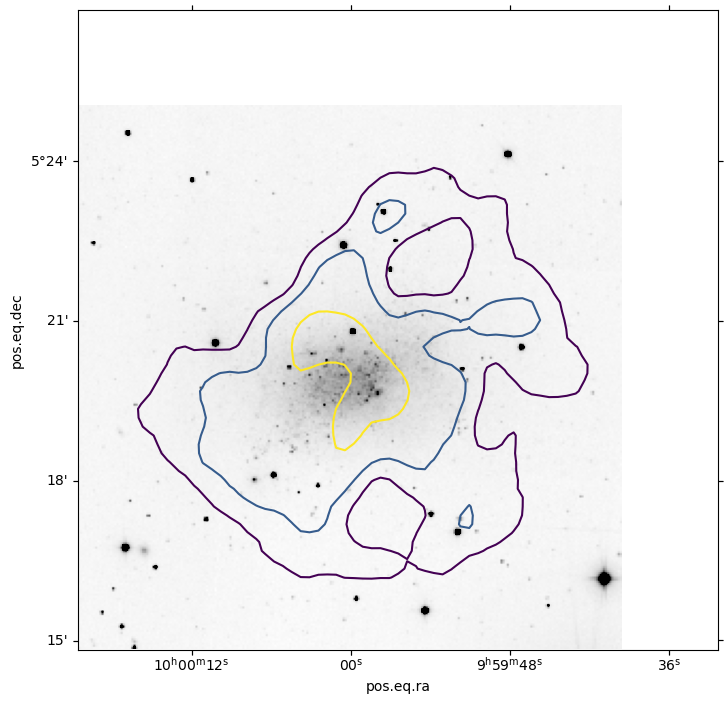

In [13]:
#open the HI fits file
hdu_hi = fits.open(nhi_fits)[0]
wcs_hi = WCS(hdu_hi.header).celestial

#open the optical file
hdu_opt = fits.open(optical_fits)[0]
wcs_opt = WCS(hdu_opt.header).celestial

#do a simple normalization of the optical image
norm = simple_norm(hdu_opt.data, 'sqrt')

#set up the figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs_opt)
ax.imshow(hdu_opt.data, origin='lower',
          cmap='binary', vmax=120, vmin=-5)
ax.contour(hdu_hi.data, origin='lower', levels = [3e20,5e20, 1e21], 
           transform=ax.get_transform(wcs_hi) )

## Play with the imaging
This is very basic. Some things you can try:
- Change the contour levels
- Change the grayscale (vmin, vmax)
- Change the displayed region of the image
- Change the color map
- Change/specify the contour colors
- Change the stretch of the image (sqrt, logarithmic)